# Classification Of Singapore Traffic Road Sign

### Project Scenario
KPMG released a benchmark report in mid-2020, naming Singapore as the top country in the world in terms of development of self-driving cars, as reflected in the government's policy-making and legislation efforts to encourage use of autonomous vehicles.

Self driving car promises to revolutionalize transportation and mobility in the world. But it must first be able to transport people and goods efficiently from point to point and does so in a safe manner. In order to be safe, self driving cars need to be able to detect and classify traffic road signs. 

In Singapore, there is a range or traffic road signs serving various purposes. 
They range from the green directional signs that tell drivers about upcoming expressway exits, to warning signs that indicate potential elements of danger ahead, such as pedestrian crossings and school zones. 

In this project, you are tasked to develop a simple Traffic Sign Recognition (TSR) as a proof-of-concept to classify Singapore's road signs. This Traffic Sign Recognition system must use Convolutional Neural Networks (CNN) for the recognition of the signs. 


In this assignment, you will be working on a team on the TSR project. 

Please answer ALL the questions below. You may refer to online documentation (e.g. keras, pandas, etc) for help on syntax. No copying of codes wholesale is allowed.

Note: Use a random_state = 42 where appropriate

The project will require the following steps:

1.Problem scoping.

>1.1.Defining problem statement using 4Ws (Who, What, Where, Why) problem canvas from the project scenario. 

2.Data acquisition and Data exploration.

>2.1.Importing various modules.

>2.2.Preparing the data.

>>2.2.1.Collect relevant data.

>>2.2.2.Perform image pre-processing and data augmentation.

>>2.2.3.Split it into train, validate, and test datasets.

>>2.2.4.Normalize the data.

3.Modelling.

>3.1.Create the model - Build a model based on convolutional neural network.

>3.2.Train the model.

4.Evaluation and Deployment.

>4.1.Evaluate the model.

>4.2.Visualizing predictions on validation set. 

>4.3.Plot the learning curve and confusion matrix.


# **©** **Kenneth Foo. All rights reserved**

> AI Applications Student | CV Graded Assignment

> **Honor Pledge for Graded Assignments**

> I affirm that I have not given or received any unauthorized help on this assignment, and that this work is my own.

> *Signature:* 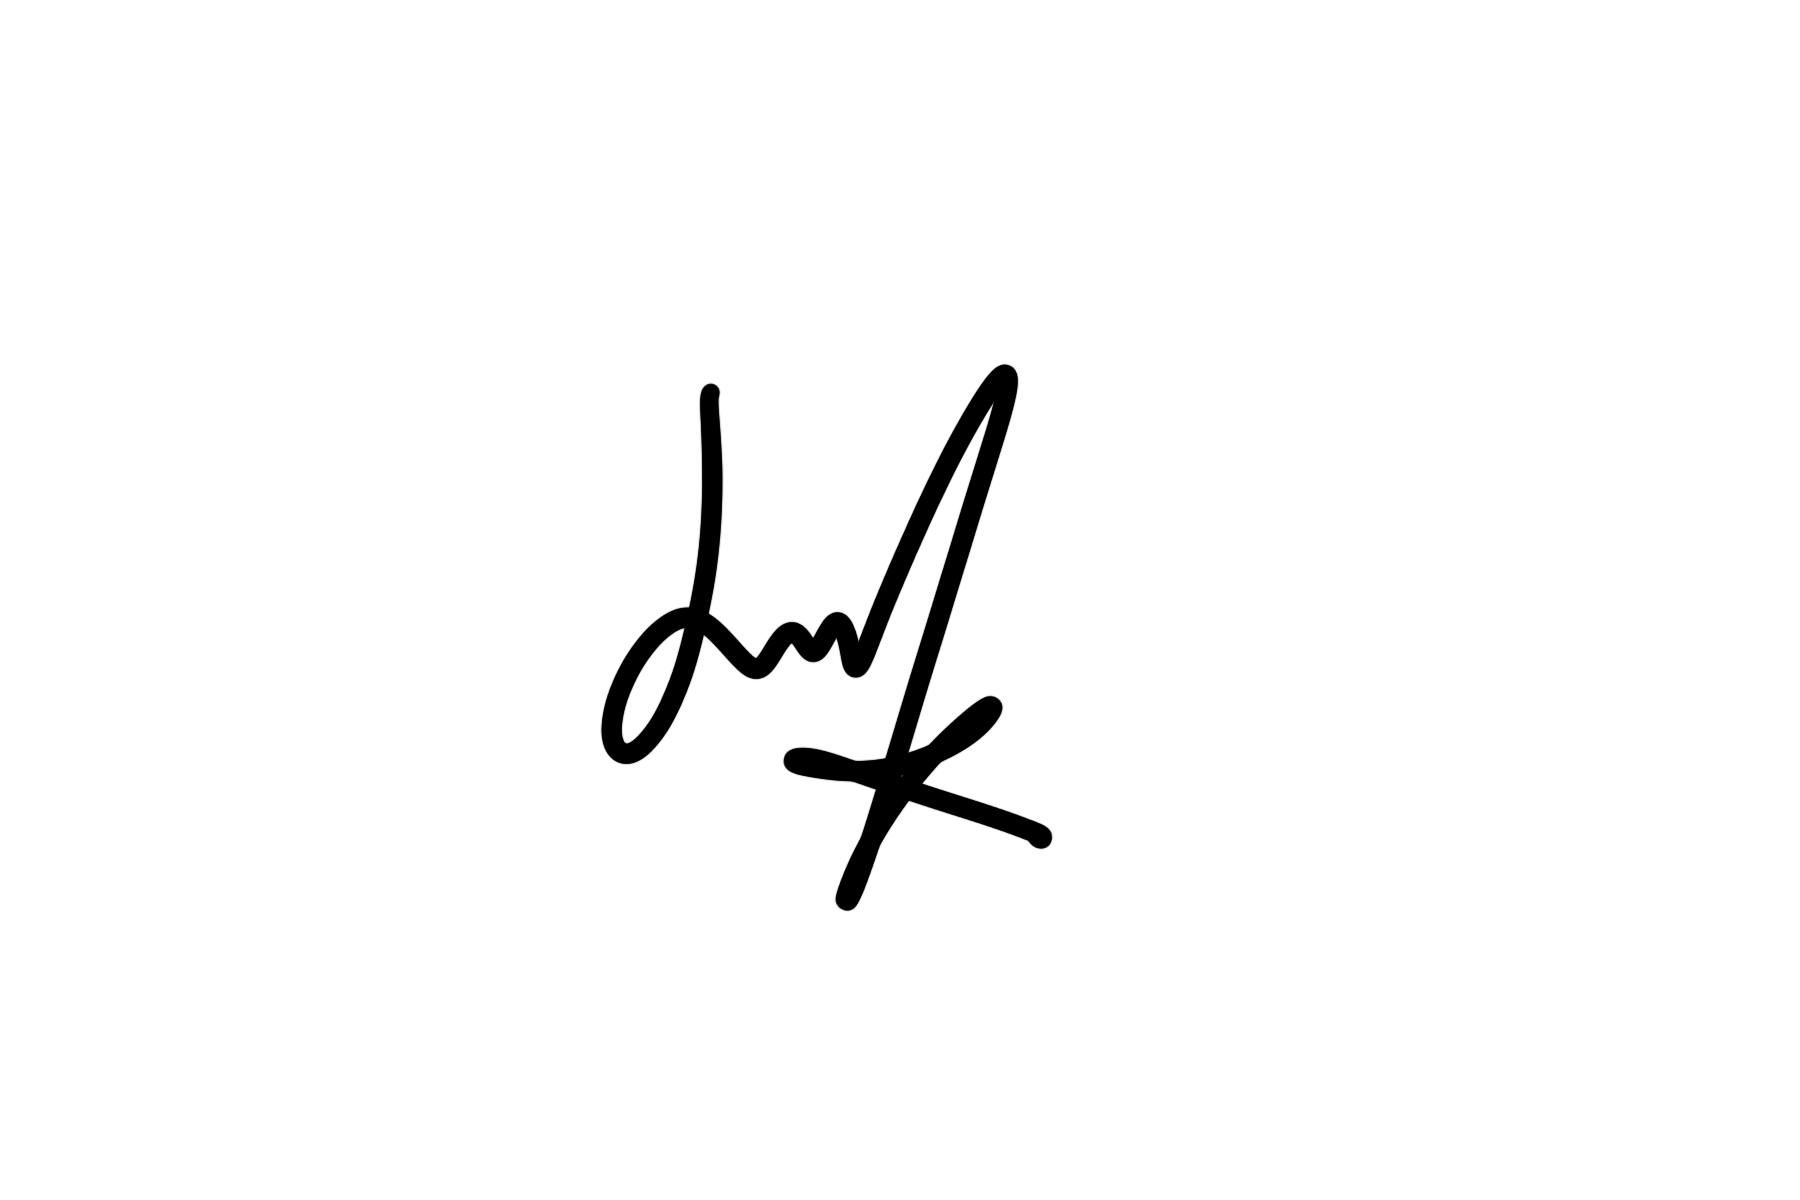











# Part 1: Build An Image Classifier




### Required Street Sign

The two required signs that you model must detect are the "U-turn sign" and the "Stop" sign. 

**1. U-Turn Sign**

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/2/2e/Singapore_road_sign_-_Informatory_-_U-Turn_permitted.svg/150px-Singapore_road_sign_-_Informatory_-_U-Turn_permitted.svg.png' width=150>


**2. Stop Sign**

<img src="https://upload.wikimedia.org/wikipedia/commons/9/92/Singapore_road_sign_-_Mandatory_-_Stop.svg" width=150>


You can also refer to reference url below:

https://onemotoring.lta.gov.sg/content/onemotoring/home/driving/road_safety_and_vehicle_rules/driving-rules.html





### Folder Structure
**Reminder**

In your google drive folder ensure you have the following directory structure set up:
```
Directory Structure In Google Drive:
MyDrive
|
+-- ITE
     |
     +--cv_essentials
        |
        +--Project
          |
          +--uturn
          |
          +--stop
          |
          +--prediction
          |
          +--model
          |
          +--train
          |   |
          |   +--uturn
          |   |
          |   +--stop
          |
          +__test
              |
              +--uturn
              |
              +--stop
```            


## Task 2.2.1: Collect relevant data

#### Go to Google Street View :

**Collect at least 30 images of each type of road signs**

https://www.google.com/maps/@1.3763186,103.7514283,3a,75y,156.4h,84.84t/data=!3m6!1e1!3m4!1s6q7fTqpBkbBuTCznNi4UKA!2e0!7i16384!8i8192

1. Navigate through the Google Street View images. 


2. When you identify the required street sign, crop the street sign and save in folder according to its name. 


___

Alternatively, you go to default Google Map: 

https://maps.google.com

1. Click on the "Browse Street View Images" icon on the bottom right. (It is the "yellow man" figure).

2. Navigate through the Google Street View images. When you identify the required street sign, crop the street sign and save in folder according to its name. 

---

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Task 2.2 : Set up the paths to your folders

In [ ]:
uturnImageDir =  '/content/drive/MyDrive/ITE/cv_essentials/Project/uturn'
stopImageDir =   '/content/drive/MyDrive/ITE/cv_essentials/Project/stop'
trainFolder =    '/content/drive/MyDrive/ITE/cv_essentials/Project/train'
testFolder =     '/content/drive/MyDrive/ITE/cv_essentials/Project/test'
prediction =     '/content/drive/MyDrive/ITE/cv_essentials/Project/prediction'

### Task 2.1 : Importing various modules

In [ ]:

import os
import shutil
import pandas as pd
import numpy as np
from tqdm import tqdm
import cv2 
import matplotlib.pyplot as plt
from matplotlib.image import imread
import math
from keras.preprocessing.image import ImageDataGenerator

import sys
import slidingwindowobjectdetectionutils as od

## Task 2.2.2 : Data Pre-processing, Data Augmentation,  Data Visualization

### Task 2.2.2 : Preprocessing And Visualizing The Images

Complete the missing code in the two functions below. 

The preprocessImage funciton reads the 'stop' and 'uturn' images collected in Task 1 and resize them to 150 x150. The resized images are saved back to drive.

The visualiseImages function uses matplotlib to show the at least 20 samples of the preprocessed images (for both 'uturn' and 'stop').

**Please do not run this cell, already executed**

100%|██████████| 30/30 [00:00<00:00, 99.88it/s]


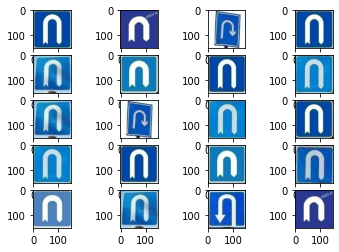

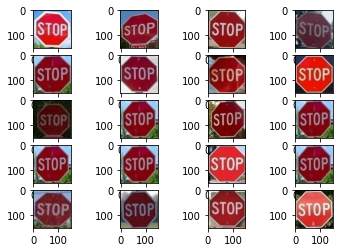

In [ ]:
"""
#Write Your Code Below
#resize the images to dimension 150x150 

imageData=[]
labelData=[]

image_size = (150,150)



def preprocessImage(imageDir):
  """ reads the stop and uturn images and resize them to 150x150 and save it back to drive"""
  for img in tqdm(os.listdir(imageDir)):
      imagePath=os.path.join(imageDir, img)

      image = cv2.imread(imagePath)
      # Resize the image
      image_resized = cv2.resize(image, image_size)

      cv2.imwrite(imagePath,image_resized)

  
  #see numpy array of first element
  #print(imageData[0],imageData[0].shape,labelData[0])




def visualiseImages(imageDir):
  """Uses maptlotlib to show at least 20 samples of the preprocessed image"""
  allImageFiles=os.listdir(imageDir)
  allImagePath=[os.path.join(i) for i in allImageFiles] 
  
  
  
  ###write your own codes below to show at least 20 samples of 'uturn' images 
  x = 1 # constantlty get updated as long below the count of 20
  for img in os.listdir(imageDir):
    plt.subplot(5, 4, x)
    image = cv2.cvtColor(cv2.imread(imageDir+'/'+img),cv2.COLOR_BGR2RGB)
    plt.imshow(image)

    # Threshold
    if x < 20:
      x += 1
    else:
      break

  plt.show()


preprocessImage(uturnImageDir)
preprocessImage(stopImageDir)
visualiseImages(uturnImageDir)
visualiseImages(stopImageDir)

"""


# **QUESTION 1:** 
Why do we implement train test split, then followed by data augmentation on train set? 

Give a reason why you should proceed in this manner.

---


**ANSWER:**

___



> The reason why we implement train test split first is to split equal amount of images into their respective directories. By doing so, first of all it is neat, second of all, instead of having all images in one big directory, I can have them in sub directories. This is beneficial for me because I can be more specific which folders I want to access and retrieve information when I do the data augmentation.



### Task 2.2.3 Train Test Split

**Requirements**
1. Split the dataset into train and test set. 
2. The train-test split raio is 50:50.

3. Create at least 15 images per train test set per label.

4. Implement data augmentation on the 15 images for train set to get 75 images per label.

5. Ensure at least 75 images for train set, 15 images for test set per label. Giving a final 80/20 train test split. 

6. The total images for train test sets for 2 labels should be at least  180 images.

7. Follow the directory structure listed in **Part 1**. 


**Please do not run this cell, already executed**

In [ ]:
"""
def train_test_split(trainRatio :float , testRatio : float):
 
  ###
  ###write your own codes below to split the images into test and train set for each label. 
  ### refer to and the follow the folder structure in part 1 to save the training and test images according to their labels. 


  uturn_filenames = os.listdir(uturnImageDir)
  stop_filenames = os.listdir(stopImageDir)

  # Reorganize the files 
  np.random.seed(42)
  np.random.shuffle(uturn_filenames)
  np.random.shuffle(stop_filenames)

  # Perform train test split
  trainFiles_uturn, testFiles_uturn = np.split(np.array(uturn_filenames),[int(round(len(uturn_filenames)*(trainRatio)))])
  trainFiles_stop, testFiles_stop = np.split(np.array(stop_filenames),[int(round(len(stop_filenames)*(trainRatio)))])

  print('Number of uturn images\n',len(uturn_filenames))
  print('Number of stop images\n',len(stop_filenames))
  print('Number of uturn images in trainset\n',len(trainFiles_uturn))
  print('Number of uturn images in testset\n', len(testFiles_uturn))
  print('Number of stop images in trainset\n',len(trainFiles_stop))
  print('Number of stop images in testset\n', len(testFiles_stop))

  # Iterate through the number of uturn images splitted for the training set
  for name in trainFiles_uturn:
    shutil.copy(uturnImageDir+'/'+name, trainFolder+"/uturn") 
  # Iterate through the number of uturn images splitted for the testing set
  for name in testFiles_uturn:
    shutil.copy(uturnImageDir+'/'+name, testFolder+"/uturn") 

  
  # Iterate through the number of stop images splitted for the training set
  for name in trainFiles_stop:
    shutil.copy(stopImageDir+'/'+name, trainFolder+"/stop")
  # Iterate through the number of stop images splitted for the testing set
  for name in testFiles_stop:
    shutil.copy(stopImageDir+'/'+name, testFolder+"/stop")  


# Call the function
train_test_split(0.5,0.5)"""

Number of uturn images
 30
Number of stop images
 30
Number of uturn images in trainset
 15
Number of uturn images in testset
 15
Number of stop images in trainset
 15
Number of stop images in testset
 15


### Task 2.2.2 : Data Augmentation

**Create a suitable data augmentation**

**Use ImageDataGenerator from keras to complete the following:**

1. There will be changes in brightness of images taken by different cameras. Factor in change in brigthness in between the range 0.3 to 0.9.

2. Images may not be captured square and upright. To cope with such variations, implement rotation with angles not more than 10. 

3. Images may also not be always centred. Therefore, shift images horizontally or vertically to center the object. Use a shift range of 0.1 for shifting images horizontally and vertically. 

4. Images are often captured at different zoom levels. Set a zoom range of betweeen 1 and 3.  

4. Set fill mode to 'nearest'.

5. The following arguments are optional:
    * samplewise_center
    * samplewise_std_normalization
    * rescale
    * channel_shift_range
    * Bonus: preprocessing_function
        * Use Gaussian Blur/ Median Blur.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import cv2

**Please do not run this cell, already executed**



> The cell below has been modified 




In [ ]:
"""
def GaussianBlur(image):
  image = cv2.GaussianBlur(image, (15, 15), 0)
  return cv2.medianBlur(image, 5)


def dataAugmentation():
  count_stop = 0
  count_uturn = 0
  
  # Give birth to the ImageDataGenerator
  ImageDataGen = ImageDataGenerator(
      samplewise_center = True,
      samplewise_std_normalization = True,
      channel_shift_range = 0.1,
      brightness_range = (0.3, 0.9),
      rotation_range = 10,
      zoom_range = [1, 3],
      horizontal_flip = True,
      fill_mode = 'nearest',
      preprocessing_function = GaussianBlur
  )
    
  # Paths
  training_imgs_stop = '/content/drive/MyDrive/ITE/cv_essentials/Project/train/stop/'
  training_imgs_uturn = '/content/drive/MyDrive/ITE/cv_essentials/Project/train/uturn/'

  # T1 Stop sign
  for image in os.listdir(training_imgs_stop):
    # Load image
    pic_stop = load_img(training_imgs_stop+image)
    # get pixel value of image
    pic_stop_pixel_value = pic_stop.getpixel
    # Convert image to array
    pic_stop_array = img_to_array(pic_stop)
    # Reshape the array
    pic_stop_array = pic_stop_array.reshape((1,) + pic_stop_array.shape)
    
    for i in range(5):
      augImage_stop = ImageDataGen.flow(
          pic_stop_array,
          batch_size = 15,
          save_to_dir = training_imgs_stop,
          save_prefix = 'AUG_',
          save_format = 'jpg',
      )
      augImage_stop.next()
  

  # Same process as T1 Uturn sign
  for image in os.listdir(training_imgs_uturn):
    pic_uturn = load_img(training_imgs_uturn+image)
    pic_uturn_pixel_value = pic_uturn.getpixel
    pic_uturn_array = img_to_array(pic_uturn)
    pic_uturn_array = pic_uturn_array.reshape((1,) + pic_uturn_array.shape)

    for i in range(5):
      augImage_uturn = ImageDataGen.flow(
          pic_uturn_array,
          batch_size = 15,
          save_to_dir = training_imgs_uturn,
          save_prefix = 'AUG_',
          save_format = 'jpg',
      )
      augImage_uturn.next()
     

# Call the function
dataAugmentation()
"""


### Task 2.2.4 : Load Data Using A Keras Utility 

Load the images off google drive using high level Keras preprocessing utilties :  **tf.keras.utils.image_dataset_from_directory**

Read and take reference from:

https://keras.io/api/preprocessing/image/

**Requirements:**

1. For train dataset, use only the following arguments for **tf.keras.utils.image_dataset_from_directory**:
* directory
* labels
* class_names\
* label_mode
* batch_size
* image_size
  * set image_size to 150 by 150


2. For test dataset, use only the following arguments for **tf.keras.utils.image_dataset_from_directory**:

* directory
* labels
*  class_names
*  label_mode
*  batch_size
*  image_size
  * set image_size to 150 by 150


In [ ]:
from tensorflow import keras

train_ds = keras.utils.image_dataset_from_directory(
    directory = trainFolder,
    labels = 'inferred',
    class_names = ('stop', 'uturn'),
    label_mode = 'int',
    batch_size = 15,
    image_size = (150,150),
    shuffle = True,
    interpolation = 'bilinear'
)



test_ds = keras.utils.image_dataset_from_directory(
    directory = testFolder,
    labels = 'inferred',
    class_names = ('stop', 'uturn'),
    label_mode = 'int',
    batch_size = 15,
    image_size = (150,150),
    shuffle = True,
    interpolation = 'bilinear'
)



Found 178 files belonging to 2 classes.
Found 30 files belonging to 2 classes.




> For a better visualization, I will used a Pie Chart of training & testing set size



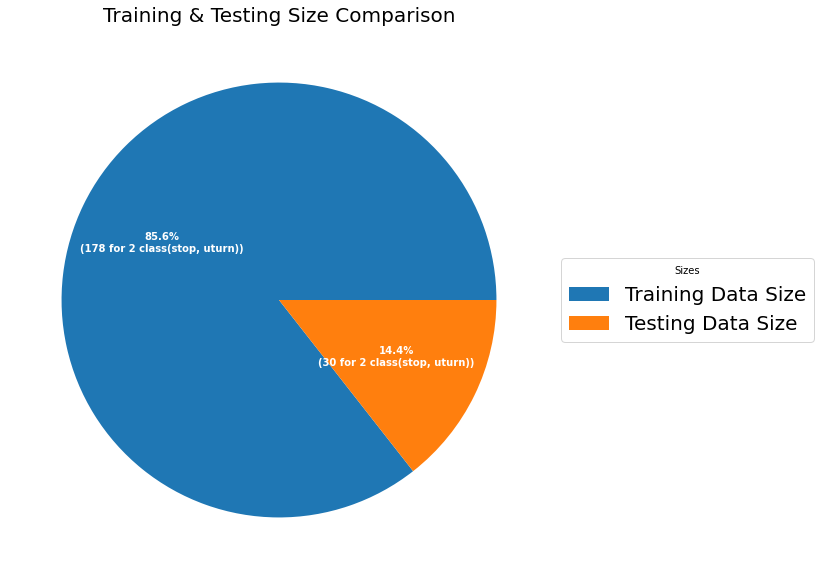

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10), subplot_kw=dict(aspect="equal"))

values = [
    178,
    30
]

names = [
    'Training Data Size',
    'Testing Data Size'
]


def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals)+1)
    return "{:.1f}%\n({:d} for 2 class(stop, uturn))".format(pct, absolute)


values, texts, autotexts = ax.pie(values, autopct=lambda pct: func(pct, values),
                                  textprops=dict(color="w"))

ax.legend(values, names,
          title="Sizes",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1),
          prop={'size': 20}
          )

plt.setp(autotexts, size=10, weight="bold")

ax.set_title("Training & Testing Size Comparison", fontsize=20)

plt.show()

## Task 3.1 : Create The Model

Build a model for image classification. The model has to identify images according to whether they contain 'uturn' or 'stop' sign. 

Use Keras Sequential API, build a simple Convolution Neural Network (CNN) to classify the 'uturn' & 'stop' signs. 

**Requirements for CNN model**
1. At least two CNN layers.
2. At least flatten layer followed by one dense layer.
3. At least one max pooling layer. 



> This was written and drawn by Kenneth Foo



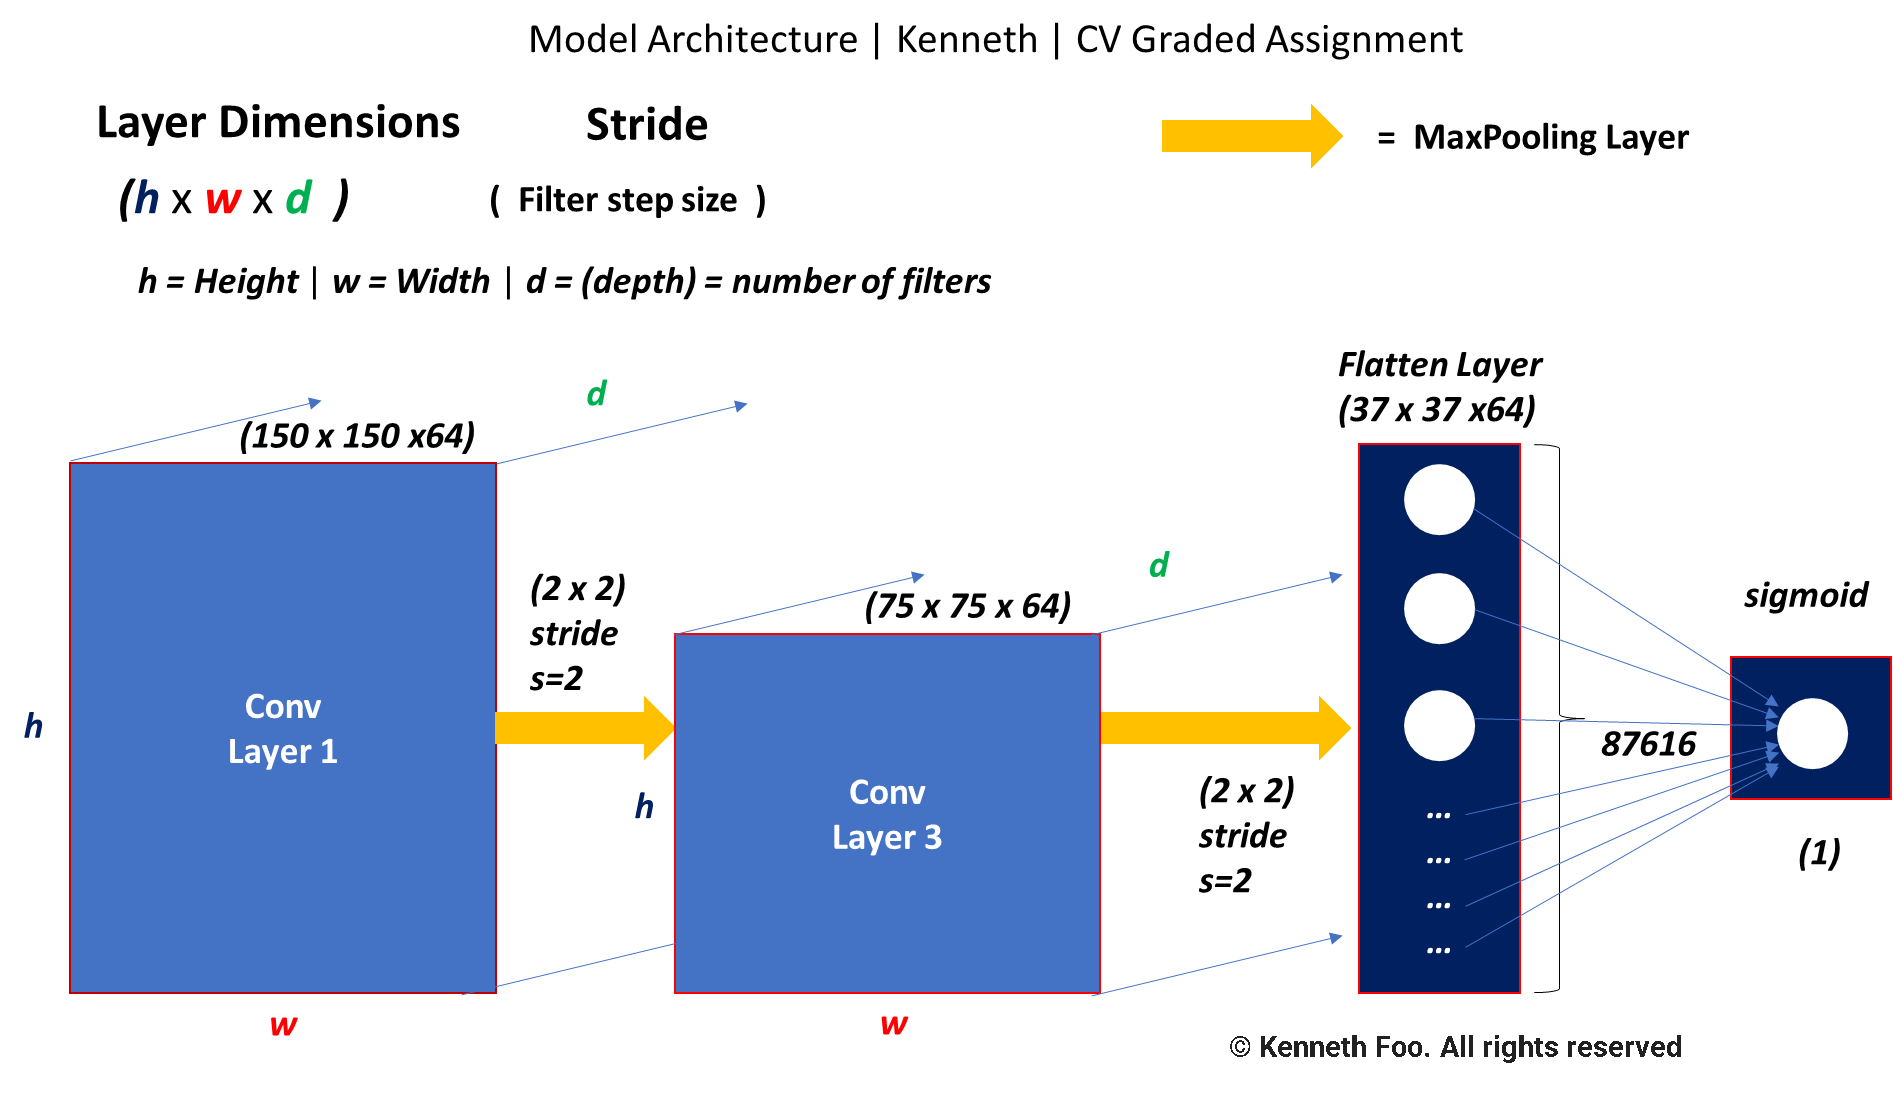

In [ ]:
from keras.layers.pooling.max_pooling2d import MaxPool2D
from keras.layers.pooling import AveragePooling2D
from keras.models import Sequential, load_model
from keras.layers import Dense
from keras.optimizers import gradient_descent_v2

from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.optimizers import SGD
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy, binary_crossentropy
import tensorflow as tf
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler

model = Sequential()

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same', input_shape=(150, 150, 3))),
model.add(MaxPool2D(pool_size=(2,2), strides=2)),
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same')),
model.add(MaxPool2D(pool_size=(2,2), strides=2)),
model.add(Flatten()),
model.add(Dense(units=1, activation='sigmoid'))
model.summary()


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 150, 150, 64)      1792      
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 75, 75, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 37, 37, 64)       0         
 g2D)                                                            
                                                                 
 flatten_7 (Flatten)         (None, 87616)             0         
                                                                 
 dense_7 (Dense)             (None, 1)                



#  Now we try to understand the filters in the model



In [ ]:
layer = model.layers
print(f'Total number of layers: {len(layer)}')

# Let's look at the filters and biases of the first layer
filters, biases = layer[0].get_weights()
print(f'Layer: {layer[0].name} | Filter size: {filters.shape}')

Total number of layers: 6
Layer: conv2d_14 | Filter size: (3, 3, 3, 64)




> Plot filters



Filters for conv2d_14


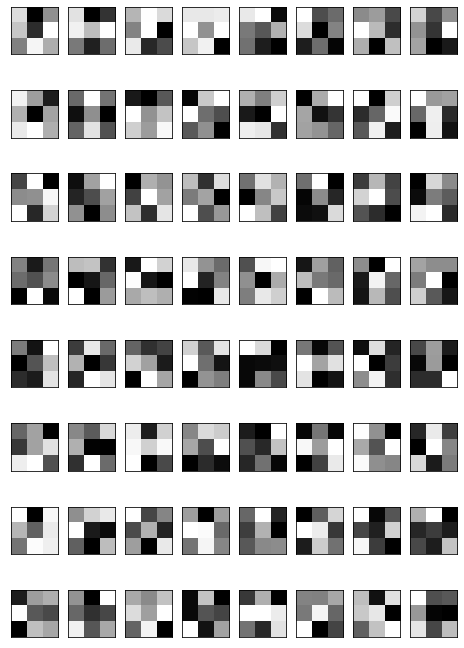

In [ ]:
fig1 = plt.figure(figsize=(8, 12))
columns = 8
rows = 8
n_filters = columns * rows
for i in range(1, n_filters + 1):
  f = filters[:, :, :, i-1]
  fig1 = plt.subplot(rows, columns, i)
  fig1.set_xticks([])
  fig1.set_yticks([])
  plt.imshow(f[:, :, 0], cmap='gray')

print(f'Filters for {layer[0].name}')
plt.show()



#  **Define a new truncated model to only include the conv layers of interest**



In [ ]:
from keras.models import Model

In [ ]:
conv_layer_index = [0, 2] # To define a shorter model , here we look at the 1st and 3th layer
outputs = [model.layers[i].output for i in conv_layer_index]
model_short = Model(inputs=model.inputs, outputs=outputs)
print(model_short.summary())

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14_input (InputLayer  [(None, 150, 150, 3)]    0         
 )                                                               
                                                                 
 conv2d_14 (Conv2D)          (None, 150, 150, 64)      1792      
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 75, 75, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 75, 75, 64)        36928     
                                                                 
Total params: 38,720
Trainable params: 38,720
Non-trainable params: 0
_________________________________________________________________
None


1/1 [==============================] - 0s 70ms/step


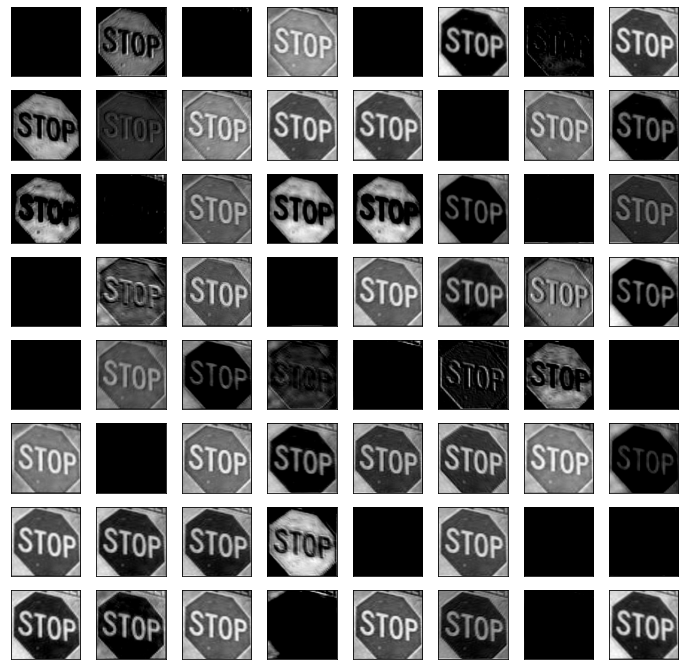

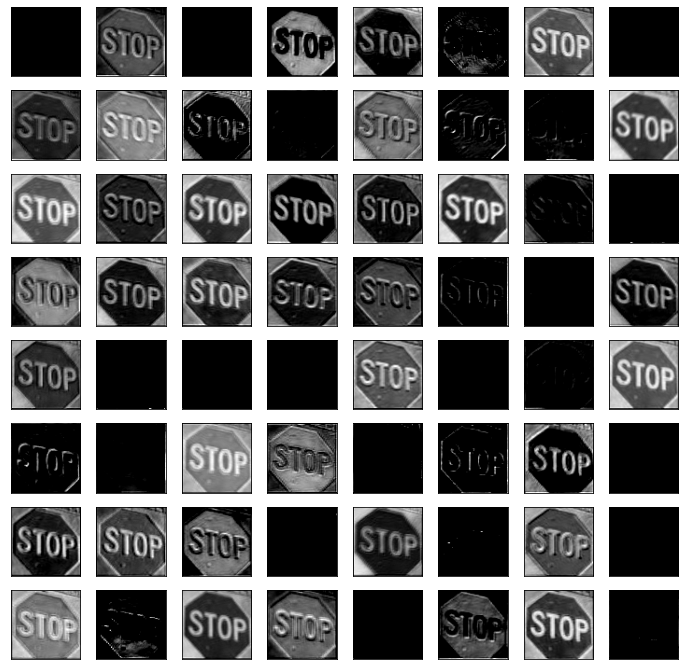

In [ ]:
from tensorflow.keras.utils import load_img, img_to_array
img_path = '/content/drive/MyDrive/ITE/cv_essentials/Project/stop/stop.jpg'
img = load_img(img_path, target_size = (150, 150))

# convert the image to an array
img = img_to_array(img)
# Expand dimensions to match the shape of model input
img = np.expand_dims(img, axis=0)

# Generate feature output by predicting on the input image
feature_output = model_short.predict(img)

columns = 8
rows = 8

for ftr in feature_output:
  fig = plt.figure(figsize=(12, 12))
  for i in range(1, columns*rows +1):
    fig = plt.subplot(rows, columns, i)
    fig.set_xticks([])
    fig.set_yticks([])
    plt.imshow(ftr[0, :, :, i-1], cmap='gray')
  plt.show()



> You can see from the above images that some filters looks at edges. Purpose of plotting the filters out from the layers of interest is to looking at the feature learning process of the filters, how every filter is able to extract different kinds of edges. To illustrate more, this is Representation Learning in Deep CNNs, where the first conv layer looks at the low level features such as the Edges, dark spots, the third layer looks at the mid-high level features. So bascially the model learn features in input image through convolution and introduce non-linearity through activation function (real-world data is non-linear), that is why I used the "relu" activation function in the Covn2D layers. The "relu" function is a pixel-by-pixel operation that replaces all negative values by zero, Non-linear operation! The Conv and Pool layers output high-level features of input, the dimensions are then flatten into fully connected layer(dense layer) for classifying the input image, to express output as the probability of image belonging to a particular class, in this case, a stop or uturn sign.



### Task 3.1 : Compiling The Model

**Requirements:**
1. Call the compile() method to specify the loss function and the optimizer to use. 
2. Select and use the correct metrics and loss function to compute during training and evaluation. 

In [ ]:
def train_model(model, train_data, val_data, save_to, epoch = 2):
    
    # optimizers
    opt_adam = Adam(learning_rate=0.001)
    opt_sgd = SGD(learning_rate=0.001)

    # callbacks
    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
    mc = ModelCheckpoint(save_to + 'Stop_Uturn_Detection.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
    lr_schedule = LearningRateScheduler(lambda epoch: 0.001 * np.exp(-epoch / 10.))
    
    
    model.compile(
      loss = 'binary_crossentropy',
      optimizer = opt_adam,
      metrics = ['accuracy']
    )
    
    history = model.fit(
      x = train_data,
      validation_data = val_data,
      epochs = epoch,
      verbose = 1,
      callbacks = [es,mc,lr_schedule]
    )
    
    
    saved_model = load_model(save_to + 'Stop_Uturn_Detection.h5')
    
    return history, saved_model

In [ ]:
history, saved_model = train_model(model, train_data = train_ds, val_data = test_ds, save_to = '/content/drive/MyDrive/ITE/cv_essentials/Project/model/', epoch = 10)

Epoch 1/10
12/12 [==============================] - ETA: 0s - loss: 47.8705 - accuracy: 0.7809
Epoch 1: val_accuracy improved from -inf to 1.00000, saving model to /content/drive/MyDrive/ITE/cv_essentials/Project/model/Stop_Uturn_Detection.h5
12/12 [==============================] - 40s 2s/step - loss: 47.8705 - accuracy: 0.7809 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 2/10
12/12 [==============================] - ETA: 0s - loss: 0.5258 - accuracy: 0.9888
Epoch 2: val_accuracy did not improve from 1.00000
12/12 [==============================] - 15s 1s/step - loss: 0.5258 - accuracy: 0.9888 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - lr: 9.0484e-04
Epoch 3/10
12/12 [==============================] - ETA: 0s - loss: 9.7665e-04 - accuracy: 1.0000
Epoch 3: val_accuracy did not improve from 1.00000
12/12 [==============================] - 15s 1s/step - loss: 9.7665e-04 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - lr: 8.1873e-04
Epoch 4/10
1

### Task 3.2 : Training The Model

### Task 3.2 : Save and Load The Model

## Task 4 : Evaluate The Model

### Plot The Learning Curves

Requirements:
Plot two graphs to illustrate your model's performance. 

1. One showing Loss vs Epochs for both Train and Test dataset. 

2. Another to show Accuracy vs Epochs for both Train and Test dataset. 

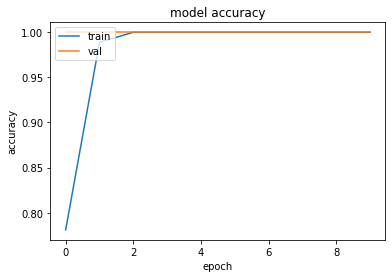

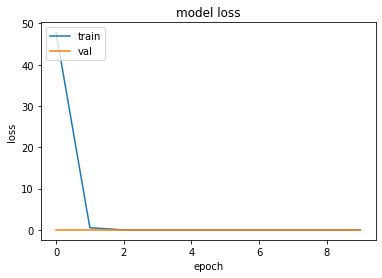

In [ ]:
def Stats():
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()

  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()

  
Stats()


# **QUESTION 2:**
Observe the Training and Test accuracy lines across the range of Epochs.
Make a recommendation about the optimum Epoch to train your model. 


**ANSWER:**

___



> Actually the optimum epoch you shall train your model at will depending on it's model accuracy and loss overtime. In this case I believe 10 is good to start off, but can be increased if the model learns at the more steady rate, meaning the model accuracy and loss should gradually increase over the number of epochs. However you see that the model I trained has a problem of overfitting, and my assumption is due to the amount of training and testing data. Perhaps the training data is too easy for the model to learn or the testing data is too easy to validate. 



# Part 2: Object Detection

### Theoretical Background

Convolutional Neural Network (CNN) can be used as an image classifier to classify images according to its various categories. When performing image classification, an image is fed into CNN, a single class label and a probability associated with the class label prediction are returned. This class label is meant to summarize the contents found in the image. 

On the other hand, for object detection, it not only classifies the image, but also provide information on where the image of interest is via a bounding box.  

It is possible to modify the use of image classification to perform objection detection.

The approach can be summarize (In Figure 1) as: 
1. Step 1 : Create a window to crop the background image.
2. Step 2 : Send each cropped image to the classifier to classify the image
3. Step 3 : Shift the window across the background image. 
4. Step 4 : Repeat step 1-4 until you reach the end of the background image. 



### Overview Of Tasks In Part 2

* Read through the codes.
* Understand how is a **sliding window** constructed.
* Understand why an **image pyramid** is required.

Inside the folder 'prediction' are 4 images. Two of them contain the 'stop' sign. Two contain the 'uturn' sign.

The following codes will use the trained classifier in Part 1, and sliding window to perform object detection on these 4 images.

Complete Task 5 and 6. 
Adjust the following parameters:

1. WIDTH -  *width of image for prediction. Choose either 300 or 600*
2. PYR_SCALE - *scale of image pyramids. Format in x.xx.for example: 1.50* 
3. WIN_STEP - *Step to shift sliding window. For example: 50 
4. ROI_SIZE = *Region of interest. For example: (150,150)
5. INPUT_SIZE = (150, 150) *do not change this*

Observe the bounding boxes and prediction on the images from 'prediction' folder. 

Answer the questions at the end of Part 2. 


#### Constructing A Sliding Window

A sliding window is a fixed size rectangle mask that slides from left to right and top to bottom of an image. At each step of sliding, the window will stop and we will extract the region of interest (ROI). 

This ROI will be passed through our trained classifier model to obtain some output predictions.

In [ ]:
predictionList=[]
path = '/content/drive/MyDrive/ITE/cv_essentials/Project/'

for eachFile in os.listdir(prediction):
  if eachFile.startswith('uturn'):
    imagePath=path+'prediction'+'/'+eachFile
    image= cv2.imread(imagePath)
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    predictionList.append((eachFile,'uturn',image))

  else:
    imagePath=path+'prediction'+'/'+eachFile
    image= cv2.imread(imagePath)
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    predictionList.append((eachFile,'stop',image))

print(predictionList)
#predictionList[0]

[('uturn2.png', 'uturn', array([[[ 49,  55,  47],
        [ 52,  58,  51],
        [ 49,  55,  47],
        ...,
        [ 39,  42,  20],
        [ 48,  51,  28],
        [ 56,  59,  35]],

       [[ 59,  65,  57],
        [ 60,  66,  57],
        [ 51,  57,  46],
        ...,
        [ 43,  46,  24],
        [ 54,  57,  34],
        [ 61,  64,  41]],

       [[ 48,  54,  43],
        [ 48,  54,  41],
        [ 48,  54,  40],
        ...,
        [ 49,  52,  30],
        [ 60,  63,  41],
        [ 65,  68,  46]],

       ...,

       [[130, 136, 138],
        [151, 156, 157],
        [147, 151, 152],
        ...,
        [ 66,  68,  55],
        [ 66,  68,  56],
        [ 68,  70,  57]],

       [[158, 163, 166],
        [164, 168, 170],
        [156, 159, 161],
        ...,
        [ 57,  59,  47],
        [ 58,  60,  48],
        [ 59,  61,  49]],

       [[143, 147, 150],
        [137, 140, 143],
        [127, 129, 132],
        ...,
        [ 43,  45,  35],
        [ 45,  47,  37],

#### Construct An Image Pyramid

Image pyramids are constructed to produce images at different scales. It will allow us to find objects in images at different scales(ie. sizes) in an image. 

At the bottom of the image pyramid is the original image at its original size. 

At each subseqent layer, the image is resized and this continue for each layer until the stopping criterion is met. This is usually a minimum size. 

<details>

1. For stop sign stop2.jpg

  * WIDTH = 600
  * PYR_SCALE = 1.2
  * WIN_STEP =100 
  * ROI_SIZE = (150,150)
  * INPUT_SIZE = (150, 150)

2. For uturn sign uturn1.jpg
  * WIDTH = 600 
  * PYR_SCALE = 1.2
  * WIN_STEP =50 
  * ROI_SIZE = (150,150)
  * INPUT_SIZE = (150, 150) 

3. For uturn sign uturn2.jpg
  * WIDTH = 600
  * PYR_SCALE = 1.01
  * WIN_STEP =150
  * ROI_SIZE = (150,150)
  * INPUT_SIZE = (150, 150)



<summary>
Click To See Possible Answers Based On Model
</summary>


</details>

#### Task 5 : Adjust The Sliding Window Parameters

In [ ]:
WIDTH = 600
PYR_SCALE = 1.2
WIN_STEP = 110
ROI_SIZE = (150, 150)
INPUT_SIZE = (150, 150)

#### Task 6 : Select Image For Object Detection

Manualy select the image from 'Prediction' folder for object detection.


In [ ]:
predictionList[0][2].shape
trialImage=predictionList[3][0]
trialImage

'uturn1.png'

In [ ]:
imagePath=path+'prediction'+'/'+trialImage
imagePath

'/content/drive/MyDrive/ITE/cv_essentials/Project/prediction/uturn1.png'

In [ ]:
sys.path.append(path)

**Quick reminder:** 

***'od'*** is from 

***import slidingwindowobjectdetectionutils as od***


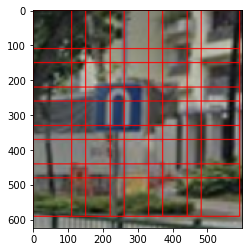

In [ ]:
od.showROI(imagePath,WIDTH,WIN_STEP,ROI_SIZE)

[[[ 32  38  32]
  [ 24  30  24]
  [ 24  31  23]
  ...
  [ 32  30  29]
  [ 35  33  32]
  [ 44  44  43]]

 [[ 28  34  29]
  [ 25  31  25]
  [ 26  33  26]
  ...
  [ 30  28  27]
  [ 34  32  31]
  [ 43  43  42]]

 [[ 30  36  30]
  [ 30  37  31]
  [ 33  40  32]
  ...
  [ 28  25  24]
  [ 32  30  29]
  [ 42  43  42]]

 ...

 [[142 148 146]
  [129 135 133]
  [139 145 142]
  ...
  [153 157 156]
  [152 155 156]
  [153 157 156]]

 [[141 148 145]
  [130 136 133]
  [140 146 144]
  ...
  [157 160 156]
  [156 157 155]
  [156 158 155]]

 [[145 154 151]
  [136 144 141]
  [145 153 151]
  ...
  [159 159 152]
  [159 158 152]
  [159 160 153]]]
624 600
Width: 600
image : (624, 600, 3)
image : (520, 500, 3)
image : (432, 416, 3)
image : (359, 346, 3)
image : (298, 288, 3)
image : (248, 240, 3)
image : (206, 200, 3)
image : (170, 166, 3)
(150, 150, 3) (150, 150, 3)
[INFO] looping over pyramid/windows took 0.03620 seconds
Total images 61.00


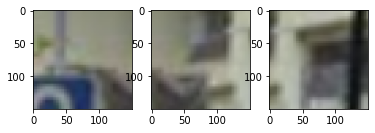

In [ ]:
import imutils

image = cv2.imread(path+'prediction/'+trialImage)
print(image)


orig = image
orig = imutils.resize(orig, width = WIDTH)
(H, W) = orig.shape[:2] 
print(H,W)


rois,locs = od.setUpROI(orig, WIN_STEP, PYR_SCALE, ROI_SIZE, INPUT_SIZE)

In [ ]:
my_preds = od.classifyROI(rois, saved_model)

(61, 150, 150, 3)
[INFO] classifying ROIs...
2/2 [==============================] - 1s 418ms/step
[INFO] classifying ROIs took 1.02758 seconds


In [ ]:
print(len(my_preds))
print(max(my_preds),min(my_preds))
preds = od.thresholdPrediction(my_preds, trialImage, threshold = 0.5)

61
[1.] [0.]
[[('uturn1.png', 'uturn', array([1.], dtype=float32))], [('uturn1.png', 'stop', array([0.00638656], dtype=float32))], [('uturn1.png', 'stop', array([1.4685789e-10], dtype=float32))], [('uturn1.png', 'stop', array([1.2041747e-12], dtype=float32))], [('uturn1.png', 'stop', array([5.76116e-11], dtype=float32))], [('uturn1.png', 'uturn', array([1.], dtype=float32))], [('uturn1.png', 'uturn', array([1.], dtype=float32))], [('uturn1.png', 'uturn', array([1.], dtype=float32))], [('uturn1.png', 'stop', array([3.2585542e-12], dtype=float32))], [('uturn1.png', 'stop', array([1.8291517e-07], dtype=float32))], [('uturn1.png', 'uturn', array([1.], dtype=float32))], [('uturn1.png', 'uturn', array([1.], dtype=float32))], [('uturn1.png', 'uturn', array([1.], dtype=float32))], [('uturn1.png', 'stop', array([0.0619272], dtype=float32))], [('uturn1.png', 'stop', array([0.01111267], dtype=float32))], [('uturn1.png', 'uturn', array([0.9999989], dtype=float32))], [('uturn1.png', 'stop', array([

In [ ]:
labels = od.createLabelsBoxesProb(preds, locs)

{'uturn': [((0, 0, 150, 150), array([1.], dtype=float32)), ((0, 110, 150, 260), array([1.], dtype=float32)), ((110, 110, 260, 260), array([1.], dtype=float32)), ((220, 110, 370, 260), array([1.], dtype=float32)), ((0, 220, 150, 370), array([1.], dtype=float32)), ((110, 220, 260, 370), array([1.], dtype=float32)), ((220, 220, 370, 370), array([1.], dtype=float32)), ((0, 330, 150, 480), array([0.9999989], dtype=float32)), ((0, 0, 180, 180), array([1.], dtype=float32)), ((0, 132, 180, 312), array([1.], dtype=float32)), ((132, 132, 312, 312), array([1.], dtype=float32)), ((264, 132, 444, 312), array([0.9240056], dtype=float32)), ((0, 264, 180, 444), array([1.], dtype=float32)), ((132, 264, 312, 444), array([1.], dtype=float32)), ((0, 0, 216, 216), array([0.99999994], dtype=float32)), ((0, 158, 216, 374), array([1.], dtype=float32)), ((158, 158, 374, 374), array([1.], dtype=float32)), ((0, 0, 260, 260), array([1.], dtype=float32)), ((0, 190, 260, 450), array([1.], dtype=float32)), ((190, 19

#### Task 7: Generate Object Detection Result

Code will produce best 5 predicted bounding boxes on object detected in image. 

Observe the prediction as your adjust parameteres in Task 5. 

uturn
[INFO] showing results for 'uturn'
[1.]
(1, 4)
stop
[INFO] showing results for 'stop'
[1.]
(1, 4)
trackProbability before sort [(array([1.], dtype=float32), 'uturn', (0, 0, 150, 150)), (array([1.], dtype=float32), 'uturn', (0, 110, 150, 260)), (array([1.], dtype=float32), 'uturn', (110, 110, 260, 260)), (array([1.], dtype=float32), 'uturn', (220, 110, 370, 260)), (array([1.], dtype=float32), 'uturn', (0, 220, 150, 370)), (array([1.], dtype=float32), 'uturn', (110, 220, 260, 370)), (array([1.], dtype=float32), 'uturn', (220, 220, 370, 370)), (array([0.9999989], dtype=float32), 'uturn', (0, 330, 150, 480)), (array([1.], dtype=float32), 'uturn', (0, 0, 180, 180)), (array([1.], dtype=float32), 'uturn', (0, 132, 180, 312)), (array([1.], dtype=float32), 'uturn', (132, 132, 312, 312)), (array([0.9240056], dtype=float32), 'uturn', (264, 132, 444, 312)), (array([1.], dtype=float32), 'uturn', (0, 264, 180, 444)), (array([1.], dtype=float32), 'uturn', (132, 264, 312, 444)), (array([0.999999

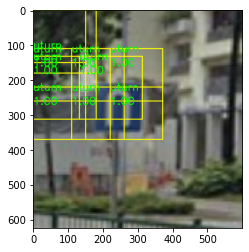

In [ ]:
od.objectDetection(orig, labels)

# QUESTION 3:

How you select a suggested window size?


**ANSWER:**

___



> Don't think there is a definite answer to this, the window size is one of the parameters you generally need to tune. However my suggestion is to choose smaller filters, but have greater number of those.



# QUESTION 4:

Give TWO disadvantages that were observed while using sliding window for object detection in this assignment.


**ANSWER:**

___

**> The parameters such as follows:**

> WIDTH = 600
  PYR_SCALE = 1.2
  WIN_STEP = 110
  ROI_SIZE = (150, 150)
  INPUT_SIZE = (150, 150)

> Have to be tuned for a different image




# QUESTION 5:

Suggest TWO algorithms for object detection that are better than using objection detection using sliding window and image classifier. 


**ANSWER:**

___

YOLO Detection Algorithm & R-CNN

___

** END OF ASSIGNMENT**

___

# **©** **Kenneth Foo. All rights reserved**